# Lab 7 - st121413
## Akraradet Sinsamersuk

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fft as fft
plt.style.use('seaborn-whitegrid')

def calFFT(signal,fs):
    number_sample = signal.shape[0]
    realRange = fs//2

    mag = np.abs(fft(signal))
    mag_norm = mag / (number_sample/2)
    mag_range = mag_norm[:number_sample//2]

    f_range = np.linspace(0,realRange,number_sample//2)
    
    return mag_range, f_range

### 1. Plot Sinc function in time domain and frequency domain


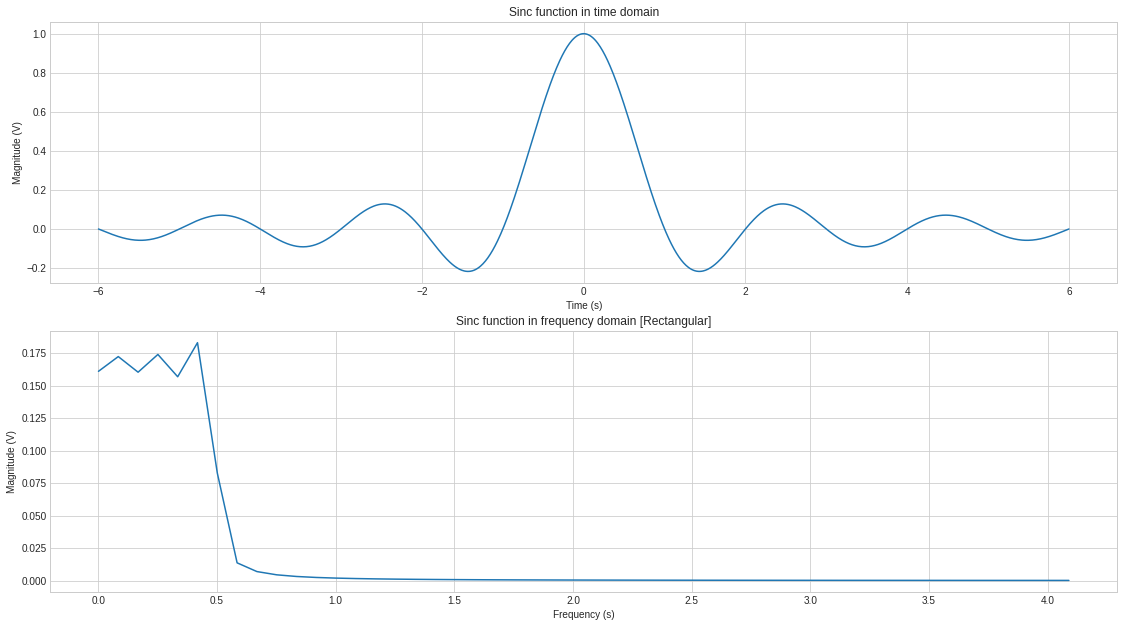

In [43]:
def sinc(t,f):
    temp = t * np.pi * f
    return np.sin(temp) / temp

f = 1
fs = 100
t = np.linspace(-6,6,1200)
ht_sinc = sinc(t,f)
fig,ax = plt.subplots(2,figsize=(16,9))
fig.tight_layout(pad=3.0)
ax[0].plot(t,ht_sinc)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title(f"Sinc function in time domain")

HF_sinc, F_range = calFFT(ht_sinc, fs)
ax[1].plot(F_range[0:50],HF_sinc[0:50])
ax[1].set_xlabel('Frequency (s)')
ax[1].set_ylabel('Magnitude (V)')
ax[1].set_title(f"Sinc function in frequency domain [Rectangular]")

plt.show()

### 2. Plot Raised-Cosine filter in time domain and frequency domain

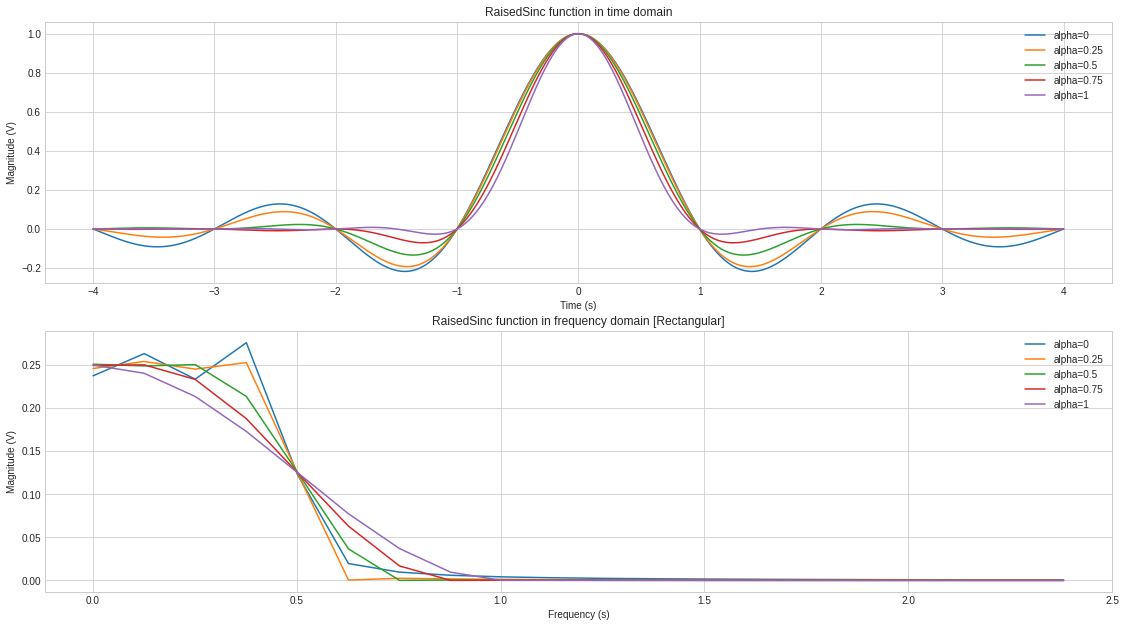

In [46]:
def RaisedSinc(t,f, alpha = 0):
    s = np.sin(t * np.pi * f) / (np.pi*t)
    c = np.cos(t * np.pi * f * alpha) / (1 - (4.0 * alpha * t * f / 2.0 )**2 )
    return s * c

f = 1
fs = 100
t = np.linspace(-4,4,800)

fig,ax = plt.subplots(2,figsize=(16,9))
fig.tight_layout(pad=3.0)
for alpha in [0, 0.25, 0.5, 0.75,  1]:
    ht_RaisedSinc = RaisedSinc(t,f,alpha)
    ax[0].plot(t,ht_RaisedSinc, label=f"alpha={alpha}")

    HF_RaisedSinc, F_range = calFFT(ht_RaisedSinc, fs)
    ax[1].plot(F_range[0:20],HF_RaisedSinc[0:20], label=f"alpha={alpha}")


ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title(f"RaisedSinc function in time domain")
ax[0].legend()


ax[1].set_xlabel('Frequency (s)')
ax[1].set_ylabel('Magnitude (V)')
ax[1].set_title(f"RaisedSinc function in frequency domain [Rectangular]")
ax[1].legend()

plt.show()

### 3. Plot Gaussian Filter in time domain and frequency domain

In [ ]:
def GaussianFilter(t,f, alpha = 0):
    # temp = t * np.pi * f
    s = np.sin(t * np.pi * f) / (np.pi*t)
    c = np.cos(t * np.pi * f * alpha) / (1 - (4.0 * alpha * t * f / 2.0 )**2 )
    return s * c

# print(4.0**2)

f = 1
fs = 100
t = np.linspace(-4,4,800)

fig,ax = plt.subplots(2,figsize=(16,9))
fig.tight_layout(pad=3.0)
for alpha in [0, 0.25, 0.5, 0.75,  1]:
    hauGuassianFilter = GaussianFilter(t,f,alpha)
    ax[0].plot(t,hauGuassianFilter, label=f"alpha={alpha}")

    HauGuassianFilter, F_range = calFFT(hauGuassianFilter, fs)
    ax[1].plot(F_range[0:20],HauGuassianFilter[0:20], label=f"alpha={alpha}")


ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title(f"GaussianFilter function in time domain")
ax[0].legend()


ax[1].set_xlabel('Frequency (s)')
ax[1].set_ylabel('Magnitude (V)')
ax[1].set_title(f"GaussianFilter function in frequency domain [Rectangular]")
ax[1].legend()

plt.show()